<a href="https://colab.research.google.com/github/krsmith/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
# Use pandas to load data as data fram
# Replace unknown header values with column names from attribute data (names to features)

import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn --upgrade
import seaborn as sns
print(sns.__version__)

col_names = ['age', 'year', 'axillary_nodes', 'survival_status']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
                 header=None,names=col_names)
df.head()

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)
0.9.0


,age,year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
# Observation count should be 306 

df.count()

age                306
year               306
axillary_nodes     306
survival_status    306
dtype: int64

In [3]:
# Should be no missing data

df.isna().sum()

age                0
year               0
axillary_nodes     0
survival_status    0
dtype: int64

In [4]:
# Replace Survival Status = 2 with 0. No need to replace 1's.
# First 2 is shown on row 7, showing 10 in order to show the replace worked.

mapping = {2: 0}
df_rep = df.replace({'survival_status': mapping})
df_rep.head(10)

,age,year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [5]:
df_rep.describe()

,age,year,axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [6]:
ct = pd.crosstab([df_rep['age'], df_rep['axillary_nodes']],df_rep['survival_status'],  normalize='columns')

ct

survival_status            0         1
age axillary_nodes                    
30  0               0.000000  0.004444
    1               0.000000  0.004444
    3               0.000000  0.004444
31  2               0.000000  0.004444
    4               0.000000  0.004444
33  0               0.000000  0.004444
    10              0.000000  0.004444
34  0               0.012346  0.004444
    1               0.000000  0.004444
    7               0.000000  0.004444
    9               0.012346  0.000000
    10              0.000000  0.004444
    30              0.000000  0.004444
35  0               0.000000  0.004444
    13              0.000000  0.004444
36  0               0.000000  0.004444
    1               0.000000  0.004444
37  0               0.000000  0.017778
    6               0.000000  0.004444
    15              0.000000  0.004444
38  0               0.000000  0.013333
    1               0.000000  0.008889
    2               0.000000  0.004444
    3               0.000000  0.004444
    5               0.000000  0.004444
    11              0.000000  0.004444
    21              0.012346  0.000000
39  0               0.012346  0.013333
    2               0.000000  0.004444
    4               0.000000  0.004444
...                      ...       ...
64  22              0.000000  0.004444
65  0               0.012346  0.017778
    1               0.000000  0.004444
    2               0.012346  0.004444
    15              0.012346  0.000000
    22              0.012346  0.000000
66  0               0.012346  0.008889
    1               0.000000  0.004444
    13              0.012346  0.000000
67  0               0.000000  0.017778
    1               0.012346  0.000000
    8               0.012346  0.000000
68  0               0.000000  0.008889
69  0               0.000000  0.013333
    8               0.012346  0.000000
70  0               0.012346  0.013333
    4               0.012346  0.000000
    8               0.000000  0.004444
    14              0.000000  0.004444
71  2               0.000000  0.004444
72  0               0.012346  0.008889
    3               0.000000  0.004444
73  0               0.000000  0.008889
74  0               0.000000  0.004444
    3               0.012346  0.000000
75  1               0.000000  0.004444
76  0               0.000000  0.004444
77  3               0.000000  0.004444
78  1               0.012346  0.000000
83  2               0.012346  0.000000

[185 rows x 2 columns]

In [46]:
age_bins = pd.cut(df_rep['age'], 5)
axill_bins = pd.cut(df_rep['axillary_nodes'], 5)

ct_bins = pd.crosstab(df_rep['survival_status'], [age_bins, axill_bins], normalize='columns')

ct_bins

age             (29.947, 40.6]                                         \
axillary_nodes  (-0.052, 10.4] (10.4, 20.8] (20.8, 31.2] (31.2, 41.6]   
survival_status                                                         
0                     0.078947          0.0          0.5          0.0   
1                     0.921053          1.0          0.5          0.0   

age                            (40.6, 51.2]                            \
axillary_nodes  (41.6, 52.0] (-0.052, 10.4] (10.4, 20.8] (20.8, 31.2]   
survival_status                                                         
0                        0.0       0.258824     0.545455          1.0   
1                        0.0       0.741176     0.454545          0.0   

age                                           ...        (61.8, 72.4]  \
axillary_nodes  (31.2, 41.6] (41.6, 52.0]     ...      (-0.052, 10.4]   
survival_status                               ...                       
0                        0.0          1.0     ...            0.215686   
1                        0.0          0.0     ...            0.784314   

age                                                                  \
axillary_nodes  (10.4, 20.8] (20.8, 31.2] (31.2, 41.6] (41.6, 52.0]   
survival_status                                                       
0                        0.8     0.333333          0.0          0.0   
1                        0.2     0.666667          0.0          0.0   

age               (72.4, 83.0]                                         \
axillary_nodes  (-0.052, 10.4] (10.4, 20.8] (20.8, 31.2] (31.2, 41.6]   
survival_status                                                         
0                     0.333333          0.0          0.0          0.0   
1                     0.666667          0.0          0.0          0.0   

age                           
axillary_nodes  (41.6, 52.0]  
survival_status               
0                        0.0  
1                        0.0  

[2 rows x 25 columns]

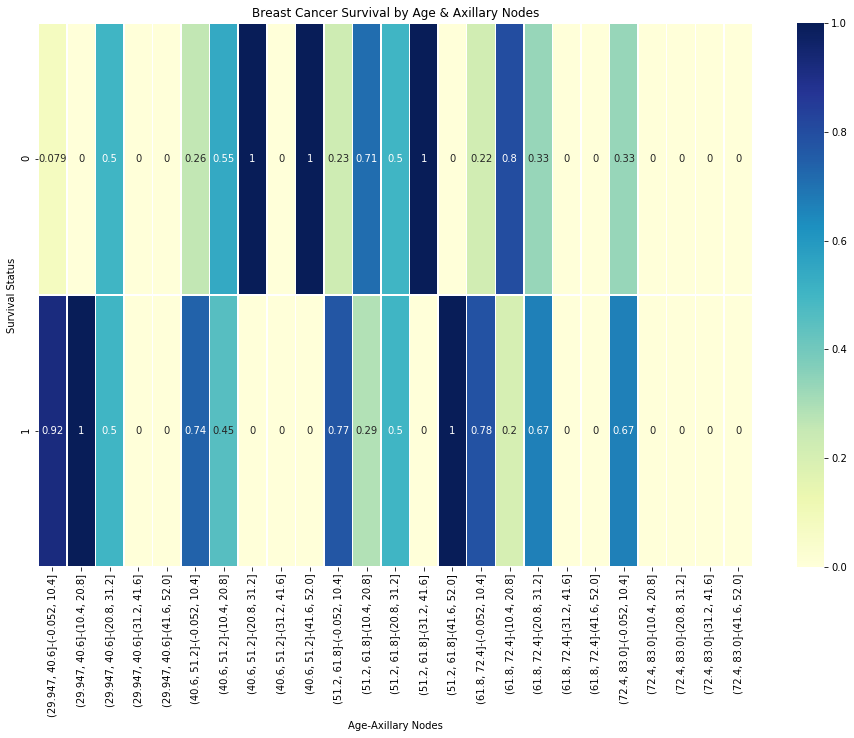

In [50]:
# Heatmap by age & axillary nodes bins

fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(ct_bins,annot=True,linewidths=.5,cmap="YlGnBu", ax=ax,vmin=0, vmax=1)

plt.title("Breast Cancer Survival by Age & Axillary Nodes")
plt.ylabel("Survival Status")
plt.xlabel("Age-Axillary Nodes");

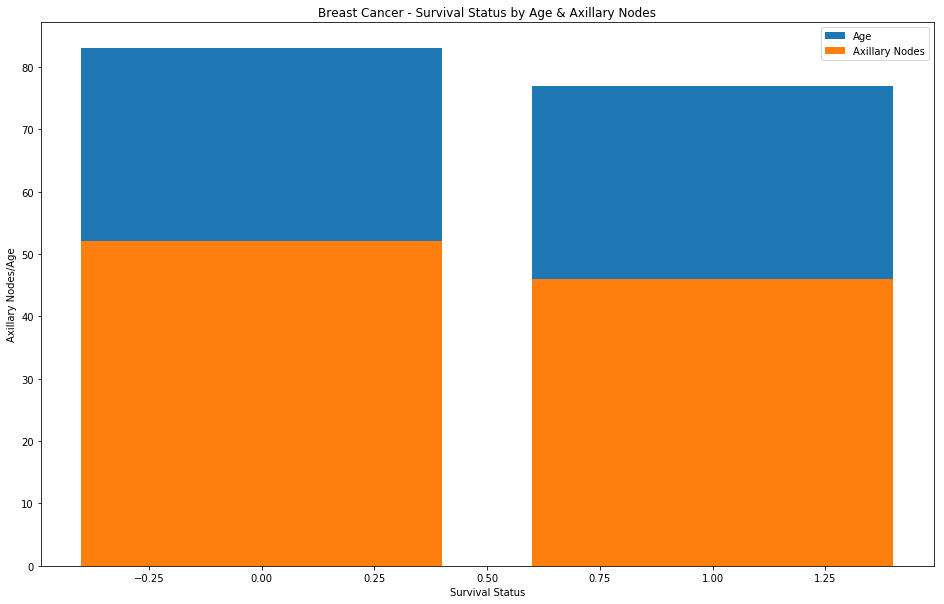

In [89]:
# Bar chart comparing age & axillary

import numpy as np

age_bins_num = pd.cut(df_rep['age'], 10, labels=False)
axill_bins_num = pd.cut(df_rep['axillary_nodes'], 10, labels=False)

fig, ax = plt.subplots(figsize=(16,10))

ax.bar(df_rep['survival_status'],df_rep['age'], label='Age')
ax.bar(df_rep['survival_status'],df_rep['axillary_nodes'], label='Axillary Nodes')

plt.title('Breast Cancer - Survival Status by Age & Axillary Nodes')
plt.xlabel("Survival Status")
plt.ylabel("Axillary Nodes/Age")
ax.legend()

plt.show()


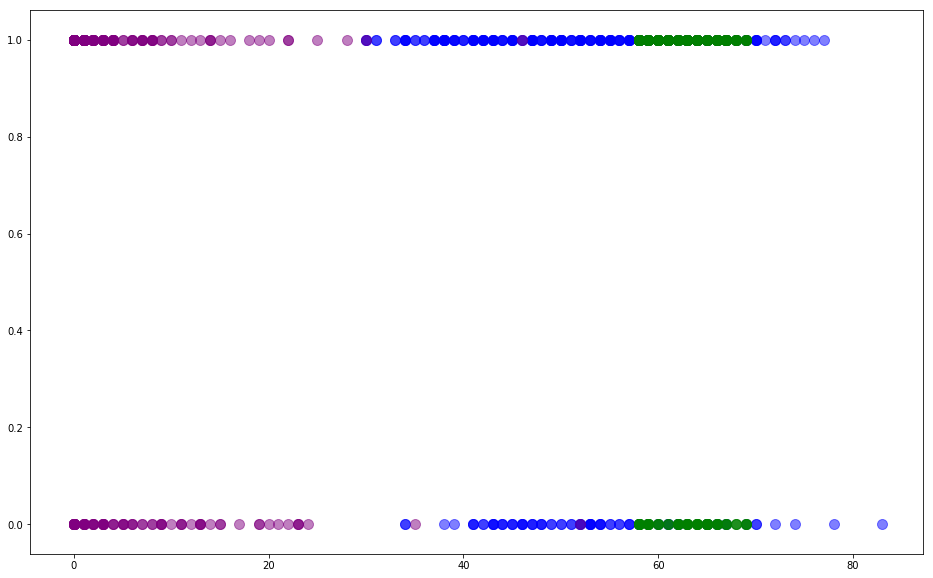

In [121]:
# Scatterplot comparing all three features

fig, ax = plt.subplots(figsize=(16,10))

plt.scatter(df_rep['age'],df_rep['survival_status'],color='Blue',alpha=.5,s=100)
plt.scatter(df_rep['year'],df_rep['survival_status'], color='Green',alpha=.5,s=100)
plt.scatter(df_rep['axillary_nodes'],df_rep['survival_status'], color='Purple',alpha=.5,s=100)

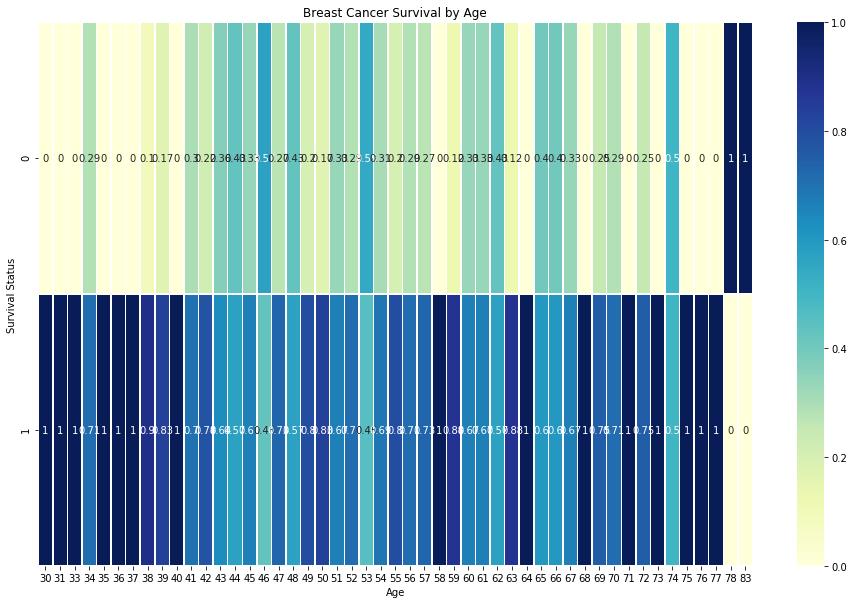

In [122]:
# Heatmap by age

ct_age = pd.crosstab(df_rep['survival_status'], [df_rep['age']], normalize='columns')

fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(ct_age,annot=True,linewidths=.5,cmap="YlGnBu", ax=ax,vmin=0, vmax=1)

plt.title("Breast Cancer Survival by Age")
plt.ylabel("Survival Status")
plt.xlabel("Age");

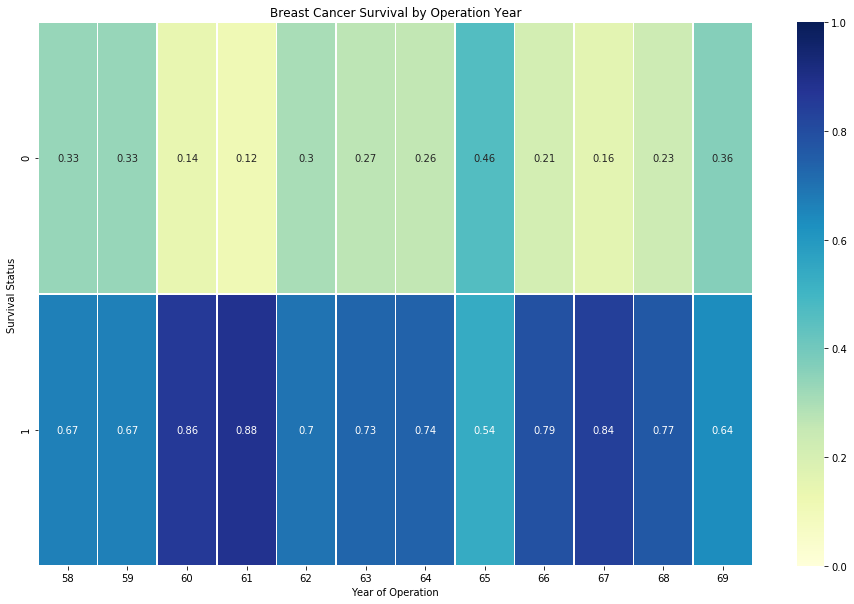

In [126]:
# Heatmap by Operation year

ct_year = pd.crosstab(df_rep['survival_status'], [df_rep['year']], normalize='columns')

fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(ct_year,annot=True,linewidths=.5,cmap="YlGnBu", ax=ax,vmin=0, vmax=1)

plt.title("Breast Cancer Survival by Operation Year")
plt.ylabel("Survival Status")
plt.xlabel("Year of Operation");

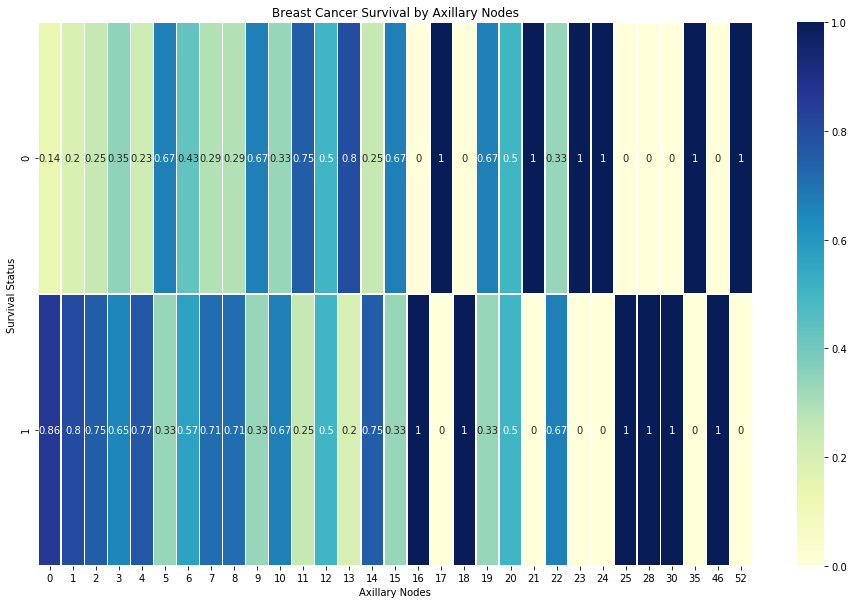

In [127]:
# Heatmap by axillary nodes

ct_ax = pd.crosstab(df_rep['survival_status'], [df_rep['axillary_nodes']], normalize='columns')

fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(ct_ax,annot=True,linewidths=.5,cmap="YlGnBu", ax=ax,vmin=0, vmax=1)

plt.title("Breast Cancer Survival by Axillary Nodes")
plt.ylabel("Survival Status")
plt.xlabel("Axillary Nodes");

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?

*Axillary Nodes - In the above heatmap, the higher axillary nodes seem to have a greater chance of survival.*

- What is at least one feature that looks to have a negative correlation with survival?

*Age - In the age heatmap, as age goes up survival is less likely.*

- How are those two features related with each other, and what might that mean?

*Together the lower age & lower axillary nodes, the greater chance for survival. Seems to be that other factors not shown in this dataset might correlate more to survival or help to predict better with the data we have.*

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.